In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

def load_data(filename):
    df = pd.read_csv("/content/MSFT.csv")
    return df

def aggregate_data(df, freq='W'):
    return df.resample(freq).mean()

def moving_average_smoothing(df, window=10):
    return df.rolling(window=window).mean()

def exponential_smoothing(df, alpha=0.2):
    model = SimpleExpSmoothing(df).fit(smoothing_level=alpha, optimized=False)
    return model.fittedvalues

def plot_results(original, smoothed, title):
    plt.figure(figsize=(12, 6))
    plt.plot(original, label='Original', alpha=0.6)
    plt.plot(smoothed, label='Smoothed', linewidth=2)
    plt.legend()
    plt.title(title)
    plt.show()

# Example usage
data_file = 'stock_prices.csv'  # Replace with your dataset
df = load_data(data_file)
closing_prices = df['Close']

# Aggregation
weekly_data = aggregate_data(df, 'W')
monthly_data = aggregate_data(df, 'M')

# Smoothing
ma_smoothed = moving_average_smoothing(closing_prices, window=10)
exp_smoothed = exponential_smoothing(closing_prices, alpha=0.2)

# Plot results
plot_results(closing_prices, ma_smoothed, 'Moving Average Smoothing')
plot_results(closing_prices, exp_smoothed, 'Exponential Smoothing')


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<ipython-input-4-71bda55d7e48>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.resample(freq).mean()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


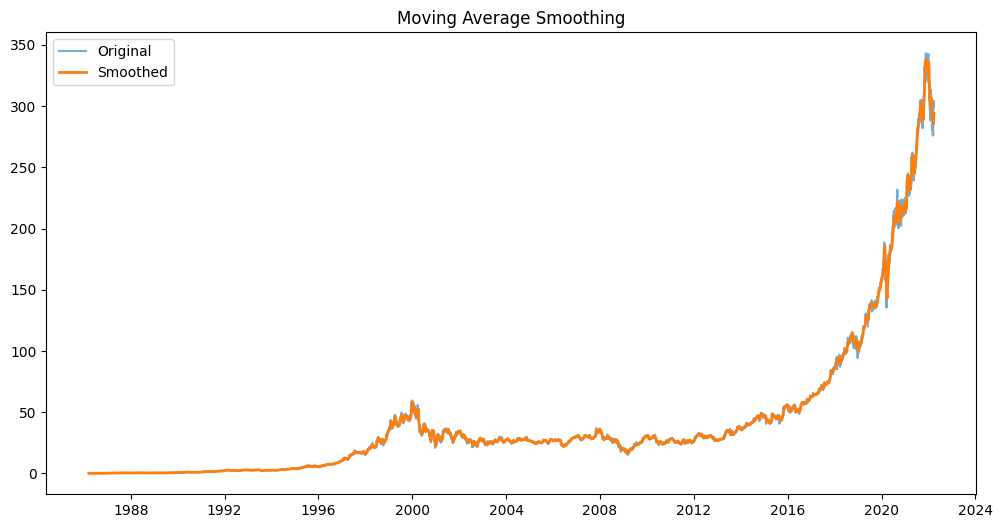

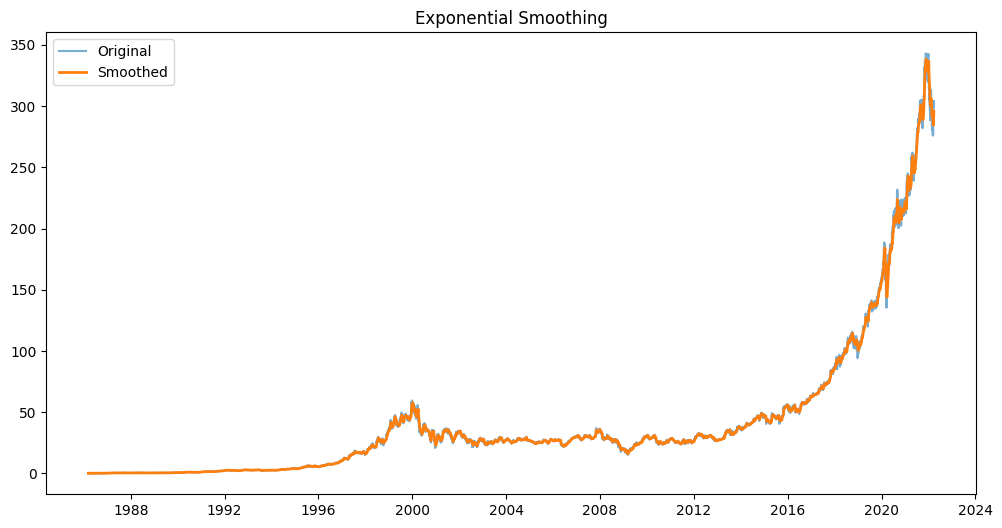

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

def load_data(filename):
    df = pd.read_csv("/content/MSFT.csv")
    # Set the 'Date' column as the index and convert it to DatetimeIndex
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime objects
    df.set_index('Date', inplace=True)  # Set 'Date' column as index
    return df

def aggregate_data(df, freq='W'):
    return df.resample(freq).mean()

def moving_average_smoothing(df, window=10):
    return df.rolling(window=window).mean()

def exponential_smoothing(df, alpha=0.2):
    model = SimpleExpSmoothing(df).fit(smoothing_level=alpha, optimized=False)
    return model.fittedvalues

def plot_results(original, smoothed, title):
    plt.figure(figsize=(12, 6))
    plt.plot(original, label='Original', alpha=0.6)
    plt.plot(smoothed, label='Smoothed', linewidth=2)
    plt.legend()
    plt.title(title)
    plt.show()

# Example usage
data_file = 'stock_prices.csv'  # Replace with your dataset
df = load_data(data_file)
closing_prices = df['Close']

# Aggregation
weekly_data = aggregate_data(df, 'W')
monthly_data = aggregate_data(df, 'M')

# Smoothing
ma_smoothed = moving_average_smoothing(closing_prices, window=10)
exp_smoothed = exponential_smoothing(closing_prices, alpha=0.2)

# Plot results
plot_results(closing_prices, ma_smoothed, 'Moving Average Smoothing')
plot_results(closing_prices, exp_smoothed, 'Exponential Smoothing')